## Importación de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importacion de Datos y limpieza

In [2]:
#importamos el df
orders_log = pd.read_csv("orders_log_us.csv")

#Cambiamos los tipos de datos convenientes
orders_log["Buy Ts"] = pd.to_datetime(orders_log["Buy Ts"],format='%Y-%m-%d %H:%M:%S')
#Combertimos de mayusculas a minusculas
orders_log.columns = [ columna.lower().replace(" ","_") for columna in orders_log.columns]
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [3]:
#importamos el df
visits_log = pd.read_csv("visits_log_us.csv")
#Cambiamos los tipos de datos convenientes
visits_log["End Ts"] = pd.to_datetime(visits_log["End Ts"],format='%Y-%m-%d %H:%M:%S')
visits_log["Start Ts"] = pd.to_datetime(visits_log["Start Ts"],format='%Y-%m-%d %H:%M:%S')
#Combertimos de mayusculas a minusculas y reemplazamos los espacios en blanco
visits_log.columns = [ columna.lower().replace(" ","_") for columna in visits_log.columns]

visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [4]:
#importamos el df
costs_us = pd.read_csv("costs_us.csv")
#Cambiamos los tipos de datos convenientes
costs_us["dt"]=pd.to_datetime(costs_us["dt"],format='%Y-%m-%d')
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Se realizo la importacions de los df y se realizo los cambios de tipos de datos convenientes asi mismo se puede notar que no hay valores duplicados.

## Visitas


### Usuarios unicos por dia, semana y mes

In [5]:
#Añadimos columnas necesarias.
visits_log["visit_day"] = visits_log["start_ts"].dt.date
visits_log["visit_week"] = visits_log["start_ts"].dt.isocalendar().week
visits_log["visit_month"] = visits_log["start_ts"].dt.month

In [6]:
print(visits_log.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid   visit_day  visit_week  visit_month  
0  16879256277535980062  2017-12-20          51           12  
1    104060357244891740  2018-02-19           8            2  
2   7459035603376831527  2017-07-01          26            7  
3  16174680259334210214  2018-05-20          20            5  
4   9969694820036681168  2017-12-27          52           12  


In [7]:
#Usuarios por dia
visit_uniq_for_day = visits_log.groupby("visit_day")["uid"].nunique()
visit_uniq_for_week = visits_log.groupby("visit_week")["uid"].nunique()
visit_uniq_for_month = visits_log.groupby("visit_month")["uid"].nunique()
print("Usuarios unicos por dia:",int(visit_uniq_for_day.mean()))
print("usuarios unicos por semana:",int(visit_uniq_for_week.mean()))
print("usuarios unicos por mes:",int((visit_uniq_for_month).mean()))


Usuarios unicos por dia: 907
usuarios unicos por semana: 5825
usuarios unicos por mes: 23228


Diagrama de comportamiento de usuarios unicos por dia, semana y mes.

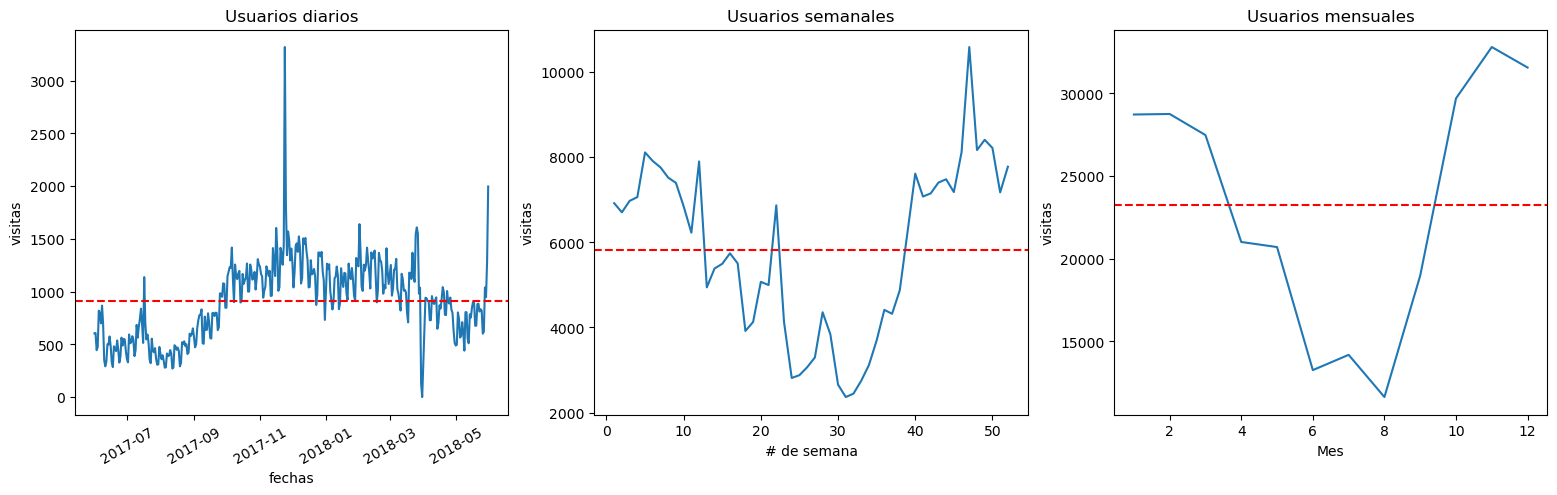

In [8]:
#Creacion de diagamra de barras
fig,ax = plt.subplots(1,3,figsize=(19,5))
ax[0].plot(visit_uniq_for_day)
ax[0].set(title="Usuarios diarios",xlabel="fechas",ylabel="visitas")
ax[0].axhline(int(visit_uniq_for_day.mean()), color='red', linestyle='--')
ax[0].tick_params(axis='x', rotation=30)

ax[1].plot(visit_uniq_for_week)
ax[1].set(title="Usuarios semanales",xlabel="# de semana",ylabel="visitas")
ax[1].axhline(int(visit_uniq_for_week.mean()), color='red', linestyle='--')

ax[2].plot(visit_uniq_for_month)
ax[2].set(title="Usuarios mensuales",xlabel="Mes",ylabel="visitas")
ax[2].axhline(int(visit_uniq_for_month.mean()), color='red', linestyle='--')

Conclusiones del grafico:
* Del grafico de usuarios diarios podemos afirmar que hay picos altos en algunas fechas especificas esto posiblemente podria deberse a alguna promocion lanzada ese dia o fechas especial como un black friday.
* Del grafico de usuarios semanales notar que hay un tendencia de crecimiento por encima del promedio entre las semana 0 hasta la semana 11 y la semana 38 hasta la 50.
* Complementando la informacion del grafico por semana podemos ver del grafico por mes que los meses con tendencia de credimiento por encima del promedio es del mes de septiembre a marzo.
* Podemos concluir que en meses especificos nuestro servicio suele tener mayor numero de visitas posiblemente debido a la estacionalidad.

### Sesiones por dia

      visit_day  session_day
0    2017-06-01          664
1    2017-06-02          658
2    2017-06-03          477
3    2017-06-04          510
4    2017-06-05          893
..          ...          ...
359  2018-05-27          672
360  2018-05-28         1156
361  2018-05-29         1035
362  2018-05-30         1410
363  2018-05-31         2256

[364 rows x 2 columns]


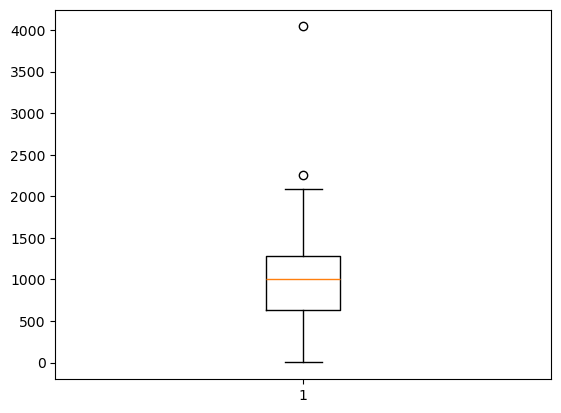

In [9]:
visit_for_day = visits_log.groupby("visit_day")["uid"].count().reset_index()
visit_for_day.columns = ["visit_day","session_day"]

print(visit_for_day)
# visualizamos un diagrama de cajas para observar valores atipicos

plt.boxplot(visit_for_day['session_day'])
plt.show()

Eliminamos valores atipicos 

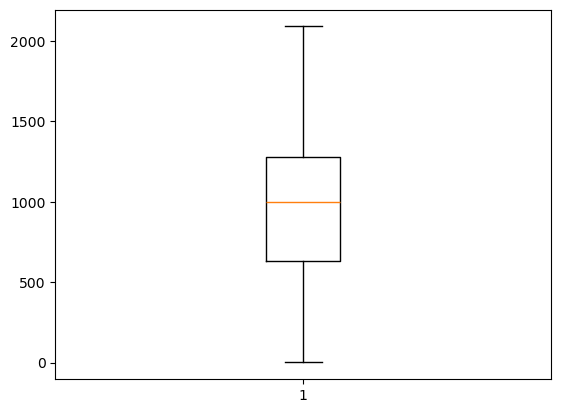

Sesiones por dia: 975


In [10]:
# Calcular el rango intercuartílico (IQR)
Q1 = visit_for_day['session_day'].quantile(0.25)
Q3 = visit_for_day['session_day'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_session_day = visit_for_day[(visit_for_day['session_day'] >= lower_bound) & (visit_for_day['session_day'] <= upper_bound)]

plt.boxplot(filtered_session_day['session_day'])
plt.show()

#Mostramos las sesiones por dia 
print("Sesiones por dia:",int(filtered_session_day["session_day"].mean()))

### Duracion de cada sesión

     device              end_ts  source_id            start_ts  \
0     touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1   desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3   desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5   desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6   desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7     touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8   desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9   desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   
10  desktop 2017-07-14 12:44:00          5 2017-07-14 12:43:00   
11  desktop 2018-01-25 19:41:00          1 2018-01-25 19:37:00   

                     uid   visit_day  visit_week  visit_month  \
0   16879256277535980062  2017-12-20          51           12   
1     104060357244891740  2018-02-19           8            2   
3   16174680259334210214  2018-05-20          20            5   
5   160075361

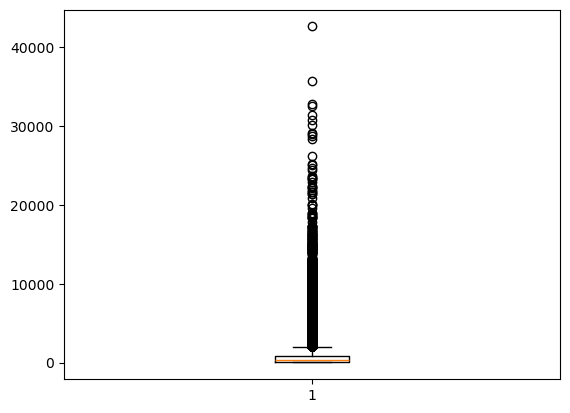

La duracion en segundos por sesion es : 714.1695158279873



In [11]:
#Añadimos la columna "duration_session" valor en segundos

visits_log["duration_session"] = (visits_log["end_ts"]- visits_log["start_ts"]).dt.total_seconds()

#filtramos los valores mayores a 0 

filtered_visits_log = visits_log.query("duration_session > 0")
print(filtered_visits_log.head(10))
print()
plt.boxplot(filtered_visits_log['duration_session'])
plt.show()

print("La duracion en segundos por sesion es :",filtered_visits_log['duration_session'].mean())
print()


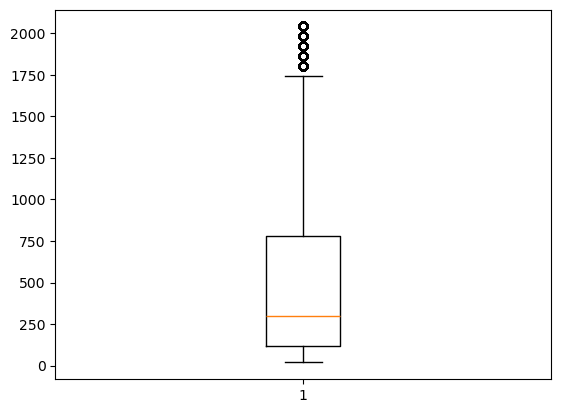

La duracion en segundos por sesion sin outlaier es : 511
La moda sin outlaier es : 60


/tmp/ipykernel_33790/3920623125.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("La moda sin outlaier es :",int(sinoutlaier_session_day["duration_session"].mode()))


In [12]:
# Calcular el rango intercuartílico (IQR)
Q1 = filtered_visits_log['duration_session'].quantile(0.25)
Q3 = filtered_visits_log['duration_session'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
sinoutlaier_session_day = filtered_visits_log[(filtered_visits_log['duration_session'] >= lower_bound) & (filtered_visits_log['duration_session'] <= upper_bound)]

plt.boxplot(sinoutlaier_session_day ['duration_session'])
plt.show()

#Mostramos las sesiones por dia 
print("La duracion en segundos por sesion sin outlaier es :",int(sinoutlaier_session_day["duration_session"].mean()))
print("La moda sin outlaier es :",int(sinoutlaier_session_day["duration_session"].mode()))

Hemos realizado el analisis de duracion de sesion de dos df uno con outlier y otros sin outlier. las duracion de estas visitas promedios son 714 segundos  y 511 segundos respectivamente. Por lo que se decide que la mejor opcion es tomar la informacion de df sin outlier para enviar esta informacion a marketing y ellos puedan aplicar alguna estrategia dentro de este rango de tiempo(511 segundos). ya que si enviamos la duracion de 714 segundo posiblemente la estrategia que vayan a aplicar no funcione como queremos. Sin embargo tambien se podria utlizar la moda el cual es 60 y es el valor que mas se repite.

### Frecuencia de usuarios que regresan

In [13]:
#creamos un df con las primeras visitas.
first_visit = visits_log.groupby("uid")["start_ts"].min().reset_index()
first_visit.columns = ["uid","first_session"]
first_visit["first_session_day"] = first_visit["first_session"].dt.date
first_visit["first_session_month"] = first_visit["first_session"].dt.month
print(first_visit)

                         uid       first_session first_session_day  \
0             11863502262781 2018-03-01 17:27:00        2018-03-01   
1             49537067089222 2018-02-06 15:55:00        2018-02-06   
2            297729379853735 2017-06-07 18:47:00        2017-06-07   
3            313578113262317 2017-09-18 22:49:00        2017-09-18   
4            325320750514679 2017-09-30 14:29:00        2017-09-30   
...                      ...                 ...               ...   
228164  18446403737806311543 2017-11-30 03:36:00        2017-11-30   
228165  18446424184725333426 2017-12-06 20:32:00        2017-12-06   
228166  18446556406699109058 2018-01-01 16:29:00        2018-01-01   
228167  18446621818809592527 2017-12-27 13:27:00        2017-12-27   
228168  18446676030785672386 2017-10-04 16:01:00        2017-10-04   

        first_session_month  
0                         3  
1                         2  
2                         6  
3                         9  
4        

In [14]:
#Unimos los df
visits_full = pd.merge(visits_log,first_visit,on="uid")

#Sacamos el tiempo de vida
visits_full["time_life"] = ((visits_full["visit_day"] - visits_full["first_session_day"])/(np.timedelta64(1,'D')*30)).round().astype(int)
print(visits_full.head(100))

     device              end_ts  source_id            start_ts  \
0     touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1   desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2     touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3   desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4   desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
..      ...                 ...        ...                 ...   
95  desktop 2018-04-12 18:16:00          3 2018-04-12 18:14:00   
96  desktop 2018-02-03 22:56:00          4 2018-02-03 22:56:00   
97  desktop 2018-01-27 23:17:00          4 2018-01-27 23:14:00   
98  desktop 2018-05-30 09:41:00          5 2018-05-30 09:40:00   
99  desktop 2018-01-30 09:28:00          2 2018-01-30 09:20:00   

                     uid   visit_day  visit_week  visit_month  \
0   16879256277535980062  2017-12-20          51           12   
1     104060357244891740  2018-02-19           8            2   
2    7459035

In [15]:
#Creamos tabala de usuarios unicos por tiempo de vida

cohortes = visits_full.pivot_table(
    index="first_session_month",
    columns="time_life",
    values="uid",
    aggfunc="nunique"
)
cohortes = cohortes.loc[[6,7,8,9,10,11,12,1,2,3,4,5]]
print(cohortes)


time_life                 0       1       2       3      4      5      6   \
first_session_month                                                         
6                    13259.0   955.0   720.0   775.0  944.0  847.0  875.0   
7                    13140.0   716.0   688.0   675.0  767.0  609.0  606.0   
8                    10181.0   691.0   634.0   577.0  547.0  412.0  438.0   
9                    16704.0  1239.0  1117.0   816.0  683.0  642.0  571.0   
10                   25977.0  1858.0  1384.0   960.0  975.0  787.0  565.0   
11                   27248.0  1849.0  1270.0  1016.0  900.0  639.0  520.0   
12                   25268.0  1257.0  1057.0   719.0  577.0  400.0  101.0   
1                    22624.0  1191.0   830.0   557.0  421.0   47.0    NaN   
2                    22197.0  1039.0   602.0   407.0   67.0    NaN    NaN   
3                    20589.0   835.0   533.0    81.0    NaN    NaN    NaN   
4                    15709.0   614.0    82.0     NaN    NaN    NaN    NaN   

In [16]:
#Creamos un df con la retencion de usuarios por su tiempo de vida
retencion = pd.DataFrame()

for lifetime in cohortes.columns:
    retencion[lifetime] = cohortes[lifetime] / cohortes[0]
 
print(retencion)

                      0         1         2         3         4         5   \
first_session_month                                                          
6                    1.0  0.072027  0.054303  0.058451  0.071197  0.063881   
7                    1.0  0.054490  0.052359  0.051370  0.058371  0.046347   
8                    1.0  0.067872  0.062273  0.056674  0.053728  0.040468   
9                    1.0  0.074174  0.066870  0.048851  0.040888  0.038434   
10                   1.0  0.071525  0.053278  0.036956  0.037533  0.030296   
11                   1.0  0.067858  0.046609  0.037287  0.033030  0.023451   
12                   1.0  0.049747  0.041832  0.028455  0.022835  0.015830   
1                    1.0  0.052643  0.036687  0.024620  0.018609  0.002077   
2                    1.0  0.046808  0.027121  0.018336  0.003018       NaN   
3                    1.0  0.040556  0.025888  0.003934       NaN       NaN   
4                    1.0  0.039086  0.005220       NaN       NaN

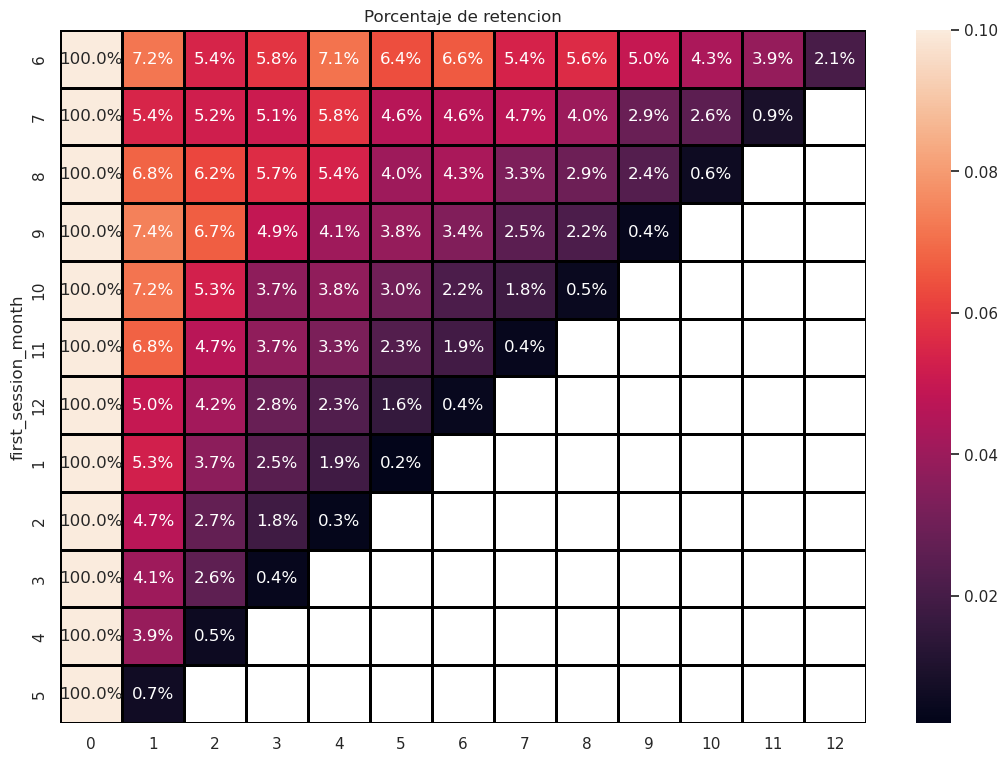

In [17]:
#Graficamos la retencion.

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Porcentaje de retencion')
sns.heatmap(retencion, annot=True, fmt='.1%', linewidths=1, linecolor='black',vmax=0.1)
plt.show()

Del grafico podemos concluir que la tasa de retencion de los primeros 4 meses ronda aproximadamente los 7.2% a 6.4% y luego de los 4 meses se va reduciendo gradualmente.

## Ventas

### Primeras compras

In [56]:
#Añadimos la columna de "day_buy" y extremos la primera compra
orders_log["day_buy"] = orders_log["buy_ts"].dt.date #sacamos el dia de compra
first_orders = orders_log.groupby("uid")["day_buy"].agg("min").reset_index() #extramos la primera compra
first_orders.columns = ["uid","first_buy"]

#Unimos ambos dataframe
orders_full = pd.merge(orders_log,first_orders,on="uid")


In [57]:
#Unimos los df de orders y visit para sacar el tiempo duro desde que se registro hasta su primera compra
bd_orders_visit = pd.merge(orders_full,visits_full,on="uid")

#Convertimos los tipos de datos
bd_orders_visit["first_buy"] = pd.to_datetime(bd_orders_visit["first_buy"])
bd_orders_visit["first_session_day"] = pd.to_datetime(bd_orders_visit["first_session_day"])

#Generamos la columna con la informacion del tiempo de compra
bd_orders_visit["life_buy"] = (bd_orders_visit["first_buy"] - bd_orders_visit["first_session_day"]).dt.days
print(bd_orders_visit.head())

               buy_ts  revenue                   uid     day_buy  first_buy  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01 2017-06-01   

    device              end_ts  source_id            start_ts   visit_day  \
0  desktop 2017-06-01 00:11:00          1 2017-06-01 00:09:00  2017-06-01   
1  desktop 2017-06-01 00:25:00          2 2017-06-01 00:14:00  2017-06-01   
2  desktop 2017-06-01 00:34:00          2 2017-06-01 00:25:00  2017-06-01   
3  desktop 2017-06-01 00:33:00          2 2017-06-01 00:14:00  2017-06-01   
4  desktop 2017-06-01 07:59:00          3 2017-06-01 07:31:00  2017-06-01   

   visit_week  visit_month  duration_session       first_sessi

In [58]:
primeras_compras_day = bd_orders_visit.groupby("first_session_day")["life_buy"].agg("mean")
primeras_compras_month = bd_orders_visit.groupby("first_session_month")["life_buy"].agg("mean")
print(primeras_compras_month)

first_session_month
1      4.828017
2      4.617889
3      1.608476
4      4.023315
5      0.899085
6     16.571630
7     51.047373
8     46.862933
9     23.968401
10    20.648701
11     9.713754
12     6.855467
Name: life_buy, dtype: float64


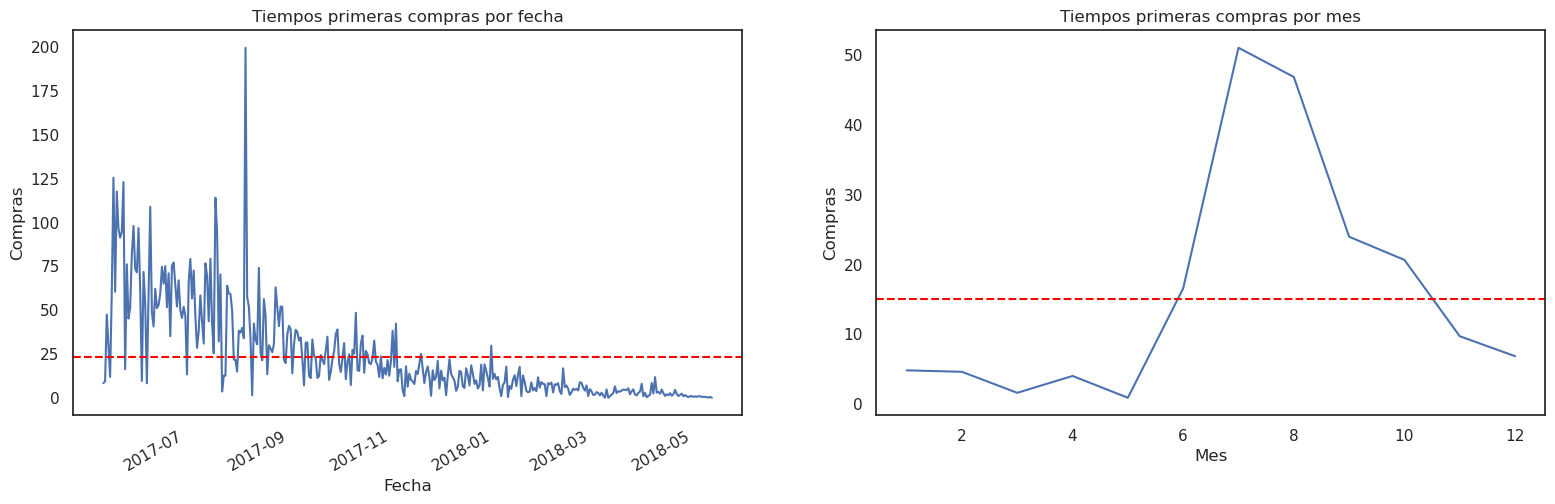

el tiempo promedio de las primeras compras es segun el cohort diarios es de : 23 dias
el tiempo promedio de las primeras compras es segun el cohort mensual es de: 15 dias


In [59]:
#Creacion de diagramas de barras
fig,ax = plt.subplots(1,2,figsize=(19,5))
ax[0].plot(primeras_compras_day)
ax[0].set(title="Tiempos primeras compras por fecha",xlabel="Fecha",ylabel="Compras")
ax[0].axhline(int(primeras_compras_day.mean()), color='red', linestyle='--')
ax[0].tick_params(axis='x', rotation=30)

ax[1].plot(primeras_compras_month)
ax[1].set(title="Tiempos primeras compras por mes",xlabel="Mes",ylabel="Compras")
ax[1].axhline(int(primeras_compras_month.mean()), color='red', linestyle='--')

plt.show()


print("el tiempo promedio de las primeras compras es segun el cohort diarios es de :",int(primeras_compras_day.mean()),"dias")
print("el tiempo promedio de las primeras compras es segun el cohort mensual es de:",int(primeras_compras_month.mean()),"dias")

Conclusiones:
* El análisis del gráfico de la cohorte diaria revela que, en promedio, los usuarios tardan 23 días en realizar su primera compra. Este dato sugiere una duración considerable entre la primera interacción y la conversión en compra, lo que podría indicar la necesidad de estrategias para acelerar el proceso de compra.
* A partir del análisis del gráfico de la cohorte mensual, se observa que los meses de enero a mayo, así como noviembre y diciembre, son los periodos en los que los usuarios presentan un menor tiempo promedio para realizar su primera compra. Este hallazgo puede ser indicativo de factores estacionales que influyen en el comportamiento de compra, lo que podría llevar a una planificación de campañas de marketing más efectiva durante estos meses clave.

### Número de pedidos

In [60]:
#añadimos columnas para la compras extrañendo el mes y la semana.
orders_full["buy_month"] = orders_full["buy_ts"].dt.month
orders_full["buy_week"] = orders_full["buy_ts"].dt.isocalendar().week
print(orders_full)

                   buy_ts  revenue                   uid     day_buy  \
0     2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   
...                   ...      ...                   ...         ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624  2018-05-31   
50411 2018-05-31 23:50:00     5.80  11369640365507475976  2018-05-31   
50412 2018-05-31 23:54:00     0.30   1786462140797698849  2018-05-31   
50413 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-31   
50414 2018-06-01 00:02:00     3.42     83872787173869366  2018-06-01   

        first_buy  buy_month  buy_week  
0      2017-06-01          6        22  
1      2017-06-01          6        22  
2      2017-

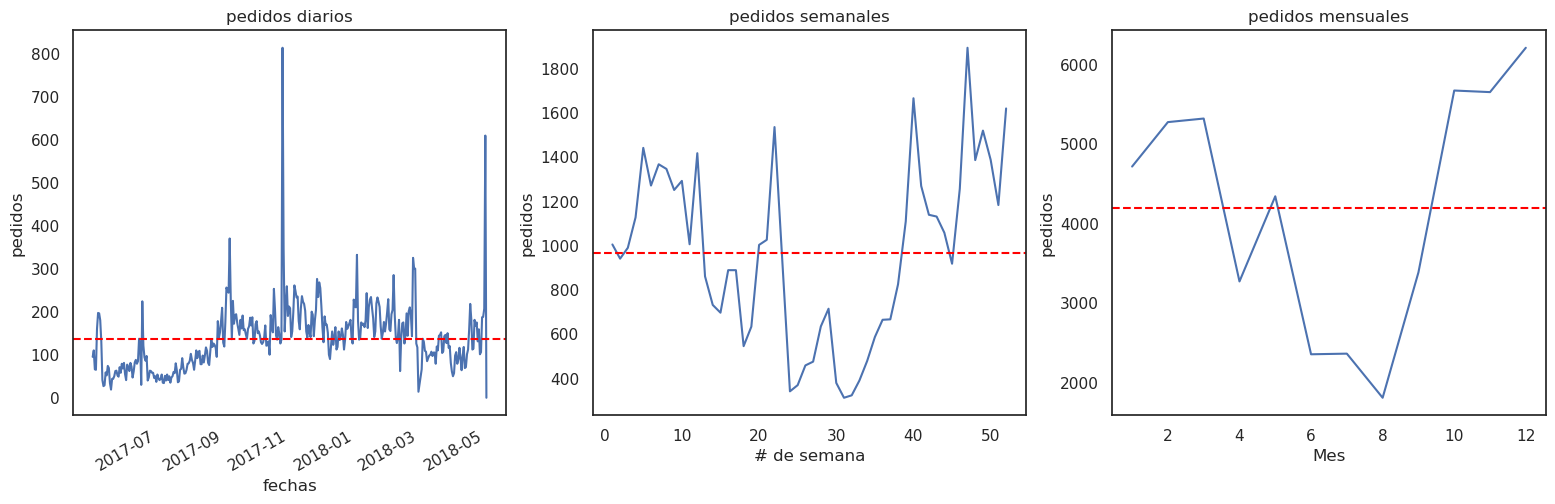

los pedidos segun el cohort diario es de : 138
los pedidos segun el cohort semanal es de : 969
los pedidos segun el cohort mensual es de : 4201


In [61]:
count_orders_day = orders_full.groupby("day_buy")["uid"].agg("count")
count_orders_week = orders_full.groupby("buy_week")["uid"].agg("count")
count_orders_month = orders_full.groupby("buy_month")["uid"].agg("count")

fig,ax = plt.subplots(1,3,figsize=(19,5))
ax[0].plot(count_orders_day)
ax[0].set(title="pedidos diarios",xlabel="fechas",ylabel="pedidos")
ax[0].axhline(int(count_orders_day.mean()), color='red', linestyle='--')
ax[0].tick_params(axis='x', rotation=30)

ax[1].plot(count_orders_week)
ax[1].set(title="pedidos semanales",xlabel="# de semana",ylabel="pedidos")
ax[1].axhline(int(count_orders_week.mean()), color='red', linestyle='--')

ax[2].plot(count_orders_month)
ax[2].set(title="pedidos mensuales",xlabel="Mes",ylabel="pedidos")
ax[2].axhline(int(count_orders_month.mean()), color='red', linestyle='--')

plt.show()

print("los pedidos segun el cohort diario es de :",int(count_orders_day.mean()))
print("los pedidos segun el cohort semanal es de :",int(count_orders_week.mean()))
print("los pedidos segun el cohort mensual es de :",int(count_orders_month.mean()))

conclusiones:
* La gráfica diaria muestra que el promedio de pedidos es de 138 por día. Sin embargo, en fechas específicas, como el Black Friday u otros eventos estacionales, se observa un aumento significativo en el número de pedidos, lo que sugiere una fuerte influencia de las promociones en el comportamiento de compra.
* El análisis de la gráfica semanal revela que las semanas del 11 al 20 y del 22 al 38 presentan una disminución en los pedidos en comparación con el promedio. Esto puede indicar períodos de baja actividad que podrían ser objeto de estrategias para incentivar las compras.
* La gráfica mensual indica que los meses con mayor volumen de pedidos son de enero a marzo y de septiembre a diciembre. Esta tendencia sugiere que el inicio del año y la temporada de fin de año son momentos clave para las ventas, lo que podría guiar las decisiones de planificación y marketing.


### Tamaño promedio de compra


In [62]:
print(orders_full.head())

               buy_ts  revenue                   uid     day_buy   first_buy  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01  2017-06-01   

   buy_month  buy_week  
0          6        22  
1          6        22  
2          6        22  
3          6        22  
4          6        22  


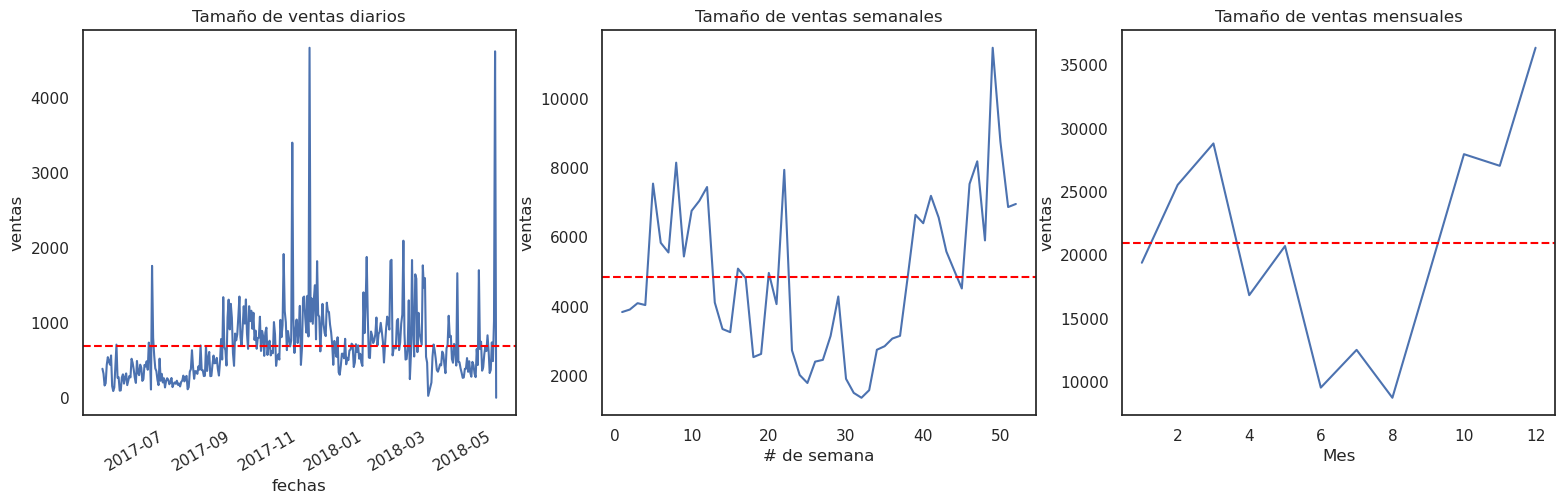

tamaño de venta segun el cohort diario es de : 692
tamaño de venta segun el cohort semanal es de : 4847
tamaño de venta segun el cohort mensual es de : 21004


In [63]:
#Agrupamos el tamaño de venta segun cohorts

revenue_orders_day = orders_full.groupby("day_buy")["revenue"].agg("sum")
revenue_orders_week = orders_full.groupby("buy_week")["revenue"].agg("sum")
revenue_orders_month = orders_full.groupby("buy_month")["revenue"].agg("sum")

#Graficamos
fig,ax = plt.subplots(1,3,figsize=(19,5))
ax[0].plot(revenue_orders_day)
ax[0].set(title="Tamaño de ventas diarios",xlabel="fechas",ylabel="ventas")
ax[0].axhline(int(revenue_orders_day.mean()), color='red', linestyle='--')
ax[0].tick_params(axis='x', rotation=30)

ax[1].plot(revenue_orders_week)
ax[1].set(title="Tamaño de ventas semanales",xlabel="# de semana",ylabel="ventas")
ax[1].axhline(int(revenue_orders_week.mean()), color='red', linestyle='--')

ax[2].plot(revenue_orders_month)
ax[2].set(title="Tamaño de ventas mensuales",xlabel="Mes",ylabel="ventas")
ax[2].axhline(int(revenue_orders_month.mean()), color='red', linestyle='--')

plt.show()

#Sacamos los promedios

print("tamaño de venta segun el cohort diario es de :",int(revenue_orders_day.mean()))
print("tamaño de venta segun el cohort semanal es de :",int(revenue_orders_week.mean()))
print("tamaño de venta segun el cohort mensual es de :",int(revenue_orders_month.mean()))

conclusiones:
* La gráfica diaria muestra que el promedio de tamaño de venta es de 692 por día. Sin embargo, en fechas específicas, como el Black Friday u otros eventos estacionales, se observa un aumento significativo en el número de pedidos, lo que sugiere una fuerte influencia de las promociones en el comportamiento de compra.
* La gráfica mensual indica que los meses con mayor tamaño de ventas son de enero a abril y de septiembre a diciembre. Esta tendencia sugiere que el inicio del año y la temporada de fin de año son momentos clave para las ventas, lo que podría guiar las decisiones de planificación y marketing.

### LTV


In [64]:
#Creamos una columna para el  LTV
bd_orders_visit["LTV"] = bd_orders_visit["revenue"]*bd_orders_visit["time_life"]

#filtramos la data, solo nos quedamos con las que tienen valor en revenue
filter_bd_orders_visit = bd_orders_visit.query("revenue > 0")

print(filter_bd_orders_visit.head())


               buy_ts  revenue                   uid     day_buy  first_buy  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01 2017-06-01   

    device              end_ts  source_id            start_ts   visit_day  \
0  desktop 2017-06-01 00:11:00          1 2017-06-01 00:09:00  2017-06-01   
1  desktop 2017-06-01 00:25:00          2 2017-06-01 00:14:00  2017-06-01   
2  desktop 2017-06-01 00:34:00          2 2017-06-01 00:25:00  2017-06-01   
3  desktop 2017-06-01 00:33:00          2 2017-06-01 00:14:00  2017-06-01   
4  desktop 2017-06-01 07:59:00          3 2017-06-01 07:31:00  2017-06-01   

   visit_week  visit_month  duration_session       first_sessi

In [65]:
#Creamos una tabla para LTV
cohortes_LTV = filter_bd_orders_visit.pivot_table(
    index="first_session_month",
    columns="time_life",
    values="LTV",
    aggfunc="mean"
)
cohortes_LTV = cohortes_LTV.loc[[6,7,8,9,10,11,12,1,2,3,4,5]]
print(cohortes_LTV)


time_life             0          1          2           3           4   \
first_session_month                                                      
6                    0.0   9.081075  14.727093   21.440100   33.655852   
7                    0.0   6.246028  16.138083   25.610457   27.664133   
8                    0.0   8.556018  18.092192   31.663757   32.617104   
9                    0.0  15.584094  40.081724  210.401335  217.740463   
10                   0.0   7.089058  14.396325   21.240764   25.687769   
11                   0.0   4.056278   8.336199   12.547044   17.031484   
12                   0.0   3.990036  22.128796   66.378684   16.392181   
1                    0.0   6.114441  10.526930   17.945281   20.643719   
2                    0.0   4.507150   8.184530   11.587792   17.024603   
3                    0.0   4.245106   8.292641    8.646055         NaN   
4                    0.0   7.741656  32.033714         NaN         NaN   
5                    0.0   4.838636   

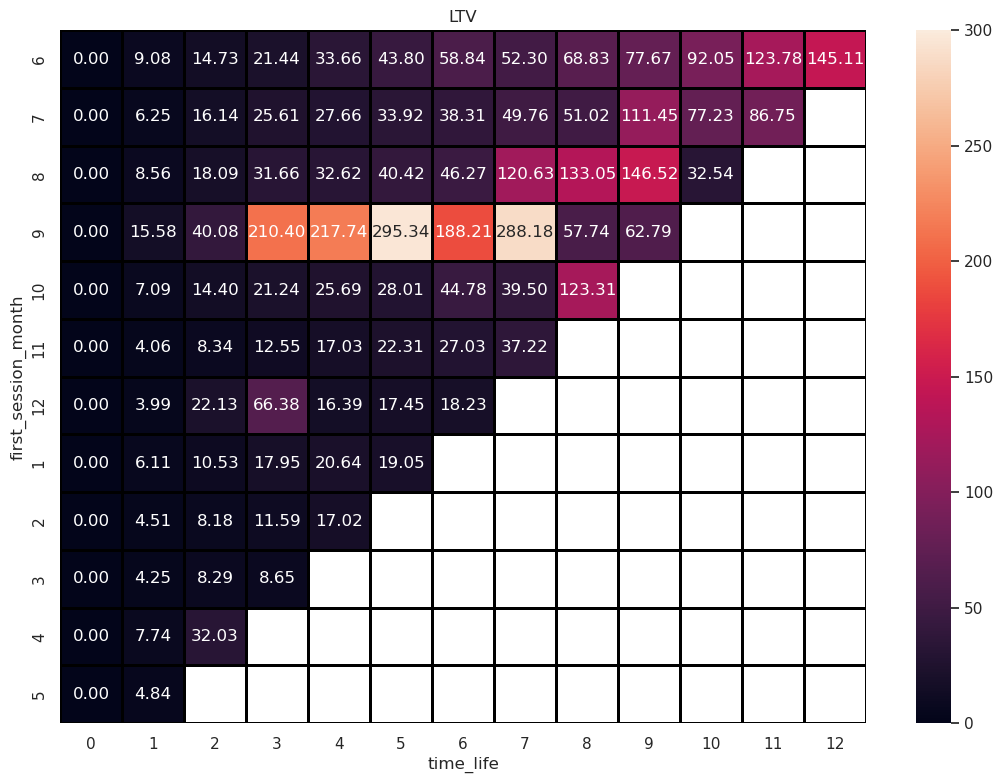

In [66]:
#Graficamos el LTV promedio

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(cohortes_LTV, annot=True, linewidths=1,fmt='.2f', linecolor='black',vmax=300)
plt.show()

Podemos indicar del grafico que aquellos que ingresaron en el mes 9 y tiempo de vida 5 tiene el maximo valor de LTV y siendo este cohort que tiene mejor LTV en su tiempo de vida.

##  Marketing

### Inversion

#### Porcentaj de Costo por fuente total 

In [50]:
#Agrupamos los costos por el tio de fuente

cost_source = costs_us.groupby("source_id")["costs"].sum().reset_index()
cost_source.columns=["source_id","costos"]

print(cost_source)

   source_id     costos
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


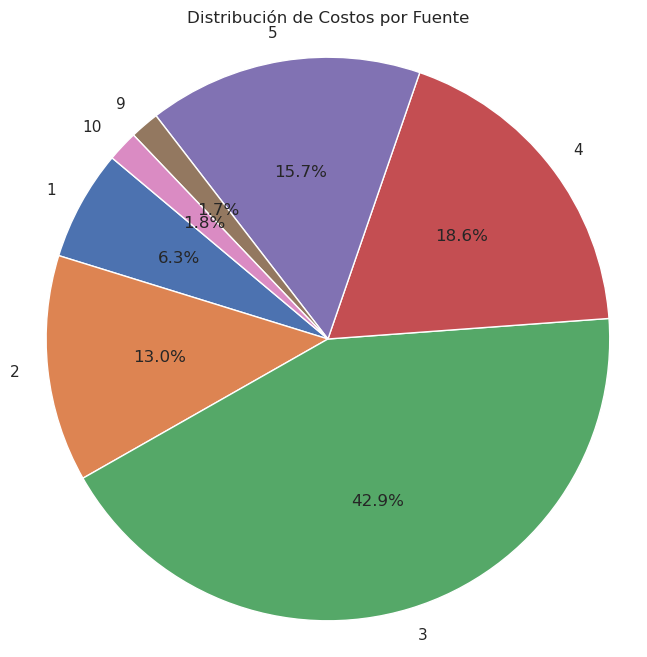

In [51]:
#Realizamos un grafico  de pastel

plt.figure(figsize=(8, 8))
plt.pie(cost_source['costos'], labels=cost_source['source_id'], autopct='%1.1f%%', startangle=140)

# Configuración del gráfico
plt.title('Distribución de Costos por Fuente')
plt.axis('equal')  # Asegura que el pastel sea circular

# Mostrar el gráfico
plt.show()

Podemos observar que la fuente que tiene mayor inversion es la numero 3 con el 42.9%, luego la 4 con 18.6% y la 5 con 15.7%.

#### Costo de adquision de cliente por fuente

In [52]:
#Agrupamos la fecha por los usuarios nuevos adquiridos
clients_nunique_day_first = orders_full.groupby("first_buy")["uid"].agg("nunique").reset_index()
clients_nunique_day_first.columns = ["dt","clientes_unicos"]
clients_nunique_day_first["dt"] = pd.to_datetime(clients_nunique_day_first["dt"])
print(clients_nunique_day_first)

            dt  clientes_unicos
0   2017-06-01               86
1   2017-06-02               97
2   2017-06-03               57
3   2017-06-04               55
4   2017-06-05              141
..         ...              ...
359 2018-05-28              129
360 2018-05-29              128
361 2018-05-30              146
362 2018-05-31              492
363 2018-06-01                1

[364 rows x 2 columns]


In [53]:
#Unimos el df al de costs_us
costs_nuevos_clients = pd.merge(costs_us,clients_nunique_day_first,on="dt")

print(costs_nuevos_clients.head())

   source_id         dt  costs  clientes_unicos
0          1 2017-06-01  75.20               86
1          1 2017-06-02  62.25               97
2          1 2017-06-03  36.53               57
3          1 2017-06-04  55.00               55
4          1 2017-06-05  57.08              141


In [54]:
#Creamos la columna month para sacar los meses
costs_nuevos_clients['month'] = costs_nuevos_clients['dt'].dt.to_period('M')

# Agrupa los datos por fuente y mes
monthly_costs_adquisicion = costs_nuevos_clients.groupby(['source_id', 'month']).agg({
    'costs': 'sum',
    'clientes_unicos': 'sum'
}).reset_index()

# Calcula el costo de adquisición mensual por cliente
monthly_costs_adquisicion['costo_adquisicion'] = monthly_costs_adquisicion['costs'] / monthly_costs_adquisicion['clientes_unicos']

# Convierte la columna 'month' de Period a datetime para graficar
monthly_costs_adquisicion['month'] = monthly_costs_adquisicion['month'].dt.to_timestamp()

print(monthly_costs_adquisicion.head())

   source_id      month    costs  clientes_unicos  costo_adquisicion
0          1 2017-06-01  1125.61             2023           0.556406
1          1 2017-07-01  1072.88             1923           0.557920
2          1 2017-08-01   951.81             1370           0.694752
3          1 2017-09-01  1502.01             2581           0.581949
4          1 2017-10-01  2315.75             4340           0.533583


    source_id      month   costs  clientes_unicos  costo_adquisicion
72         10 2017-06-01  314.22             2023           0.155324
73         10 2017-07-01  329.82             1923           0.171513
74         10 2017-08-01  232.57             1370           0.169759
75         10 2017-09-01  460.67             2581           0.178485
76         10 2017-10-01  627.24             4340           0.144525
77         10 2017-11-01  792.36             4081           0.194158
78         10 2017-12-01  645.86             4383           0.147356
79         10 2018-01-01  614.35             3373           0.182138
80         10 2018-02-01  480.88             3651           0.131712
81         10 2018-03-01  526.41             3533           0.148998
82         10 2018-04-01  388.25             2276           0.170584
83         10 2018-05-01  409.86             2988           0.137169


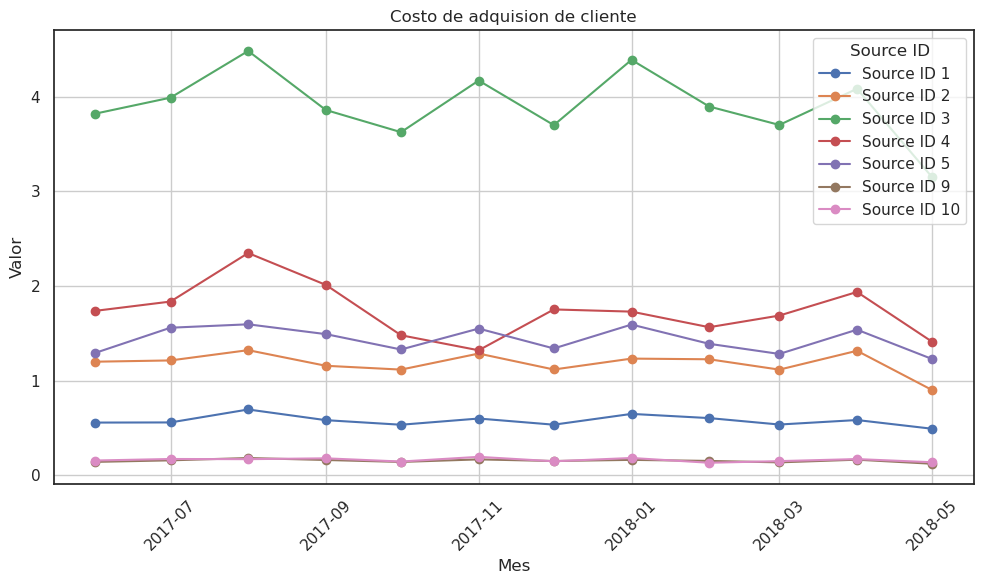

In [69]:

# Graficar cada source_id
plt.figure(figsize=(10, 6))
for source in monthly_costs_adquisicion['source_id'].unique():
    df_source = monthly_costs_adquisicion[monthly_costs_adquisicion['source_id'] == source]
    plt.plot(df_source['month'], df_source['costo_adquisicion'], marker='o', label=f'Source ID {source}')

print(df_source)

# Configuración del gráfico
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.title("Costo de adquision de cliente")
plt.xticks(rotation=45)
plt.legend(title='Source ID')
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* Del grafico podemos indicar que el que tiene menor costo de adquision es la fuente numero 10 seguido por la numero 1 y la numero 2. 
* Comparando este ultimo grafico "Costo de adquision de cliente" la fuente numero 3 es el cual tiene el costo de aquision mas alto y  con el de "Distribución de Costos por Fuente" esta misma fuente tiene los costos mas elevados, tendriamos que evaluar la si es conveniente o no seguir invirtiendo en esta fuente para la obtencion de nuevos clientes.

## rentabilidad de las inversiones (ROMI)

In [35]:
#Agrupamos los costos por mes
dt_cost_monthly = costs_nuevos_clients.groupby("month")["costs"].sum().reset_index()
dt_cost_monthly.columns = ["month","costs"]
print(costs_us["costs"].sum())
print(orders_log["revenue"].sum())
print(orders_log["revenue"].sum()-costs_us["costs"].sum())
print(dt_cost_monthly)

329131.62
252057.19999999998
-77074.42000000001
      month     costs
0   2017-06  18015.00
1   2017-07  18240.59
2   2017-08  14790.54
3   2017-09  24368.91
4   2017-10  36322.88
5   2017-11  37907.88
6   2017-12  38315.35
7   2018-01  33518.52
8   2018-02  32723.03
9   2018-03  30414.57
10  2018-04  22289.38
11  2018-05  22224.27


In [36]:
#Agrupamos los ingresos por mes
renueve_month = orders_log[["day_buy","revenue"]]
renueve_month = renueve_month.assign(day_buy=pd.to_datetime(renueve_month["day_buy"]).dt.to_period('M'))

renueve_month = renueve_month.groupby("day_buy")["revenue"].sum().reset_index()
renueve_month.columns = ["month","renueve"]
print(renueve_month)

      month   renueve
0   2017-06   9557.49
1   2017-07  12539.47
2   2017-08   8758.78
3   2017-09  18345.51
4   2017-10  27987.70
5   2017-11  27069.93
6   2017-12  36388.60
7   2018-01  19417.13
8   2018-02  25560.54
9   2018-03  28834.59
10  2018-04  16858.06
11  2018-05  20735.98
12  2018-06      3.42


In [46]:
#Unimos los df
ROMI = pd.merge(dt_cost_monthly,renueve_month, on = "month")

#Calculamos el ROMI
ROMI["romi"] = (ROMI["renueve"]-ROMI["costs"])/ROMI["costs"]

print(ROMI)


      month     costs   renueve      romi
0   2017-06  18015.00   9557.49 -0.469470
1   2017-07  18240.59  12539.47 -0.312551
2   2017-08  14790.54   8758.78 -0.407812
3   2017-09  24368.91  18345.51 -0.247176
4   2017-10  36322.88  27987.70 -0.229475
5   2017-11  37907.88  27069.93 -0.285902
6   2017-12  38315.35  36388.60 -0.050287
7   2018-01  33518.52  19417.13 -0.420704
8   2018-02  32723.03  25560.54 -0.218882
9   2018-03  30414.57  28834.59 -0.051948
10  2018-04  22289.38  16858.06 -0.243673
11  2018-05  22224.27  20735.98 -0.066967


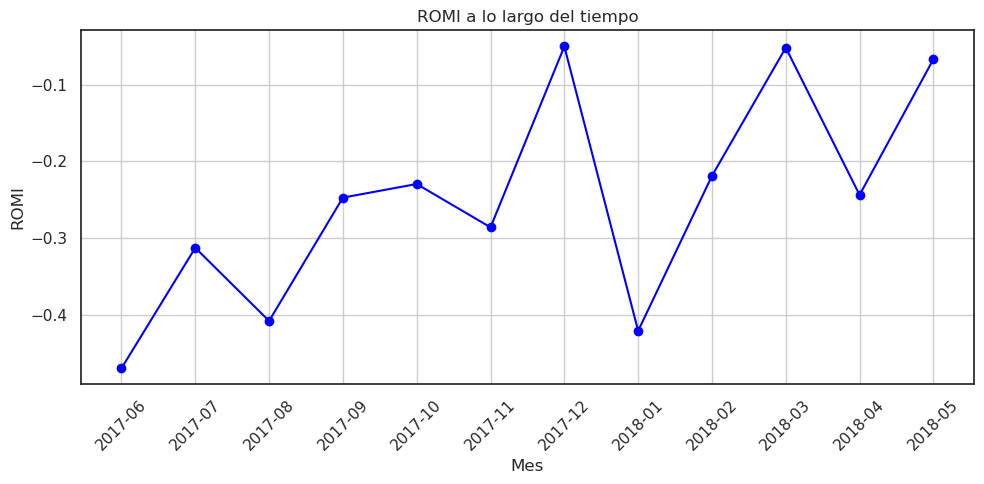

In [45]:
#Graficamos el ROMI en el tiempo
plt.figure(figsize=(10, 5))
plt.plot(ROMI['month'].astype(str), ROMI['romi'], color='blue', marker='o')
plt.title('ROMI a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

* Del grafico podemos observar que los ROMI son negativos, lo cual indica que la inversion en marketing no esta generando un retorno positivo. Esto podria ser consecuencia de falta de segmentacion, inversion en canales no adecuados, problemas con  la conversion.

## Conclusiones

* Según el gráfico de "usuarios mensuales", se sugiere que el equipo de marketing y ventas realice campañas específicas dentro de la plataforma web durante los meses de septiembre a marzo. En estos meses, se observa un aumento significativo en el número de usuarios, lo que presenta una oportunidad ideal para incrementar el engagement y las conversiones.
*  El gráfico de pastel que muestra la "distribución de costos por fuente" indica que el canal de captación de clientes número 3 representa el mayor costo, pero también tiene el menor índice de conversión. Se recomienda realizar una evaluación exhaustiva de este canal y considerar alternativas más eficientes, como el canal número 10, que podría ofrecer una mejor rentabilidad en términos de captación de clientes.
* La persistencia de un ROMI negativo durante un año, oscilando entre -0.1 y -0.4, indica problemas críticos en la estrategia de marketing. Esto sugiere que las inversiones actuales son ineficaces y están erosionando el capital. Es urgente que el equipo de marketing y ventas realice cambios significativos, como revisar las campañas, evaluar la propuesta de valor y analizar la competencia. Un enfoque proactivo en la optimización de las estrategias de captación y conversión será clave para mejorar la rentabilidad y asegurar la viabilidad a largo plazo de la empresa.